In [1]:
import numpy as np
import matplotlib.pyplot as plt

import runTracker

In [2]:
runData = runTracker.data()

In [3]:
runData.data

Date     HR   Pace  Temp  Performance
0   19/03  160.0  10:21  19.0         0.83
1   21/03  163.0  10:39  16.0         0.77
2   24/03  165.0  10:01   8.0         0.78
3   26/03  164.0  10:57  10.0         0.72
4   28/03  160.0  10:06  17.0         0.83
5   30/03  162.0   9:46   4.0         0.81
6   01/04  160.0   9:48  13.0         0.83
7   04/04  162.0   9:38  16.0         0.86
8   06/04  161.0   9:32  19.0         0.90
9   08/04  162.0   9:38  21.0         0.91
10  10/04  162.0   9:32  22.0         0.93
11  12/04  163.0  10:15  23.0         0.87
12  14/04  161.0   9:12  16.0         0.90
13  16/04  162.0   9:30  22.0         0.93
14  18/04  164.0   9:43  24.0         0.93
15  19/04  165.0   9:42  19.0         0.86
16  21/04  164.0   9:30  16.0         0.86
17  23/04  160.0   9:38  23.0         0.95
18  25/04  164.0   9:44  21.0         0.89
19  26/04  162.0   9:24  20.0         0.92
20  28/04  161.0   9:28  15.0         0.87

In [4]:
average = np.ones(len(runData.data['Performance'])) * np.mean(runData.data['Performance'])
std = np.ones(len(runData.data['Performance'])) * np.std(runData.data['Performance'])
trendline = runData.trendline()

In [5]:
lower_triangle = ((average[0] - trendline[0]) * 4)/2
upper_triangle = ((trendline[-1] - average[-1]) * 4)/2
print(np.round(np.abs(lower_triangle - upper_triangle)/(np.mean((upper_triangle,lower_triangle))),2))

0.0


In [6]:
runData.data['PaceF'] = runData.pace_to_float()

In [7]:
def customFig():
    fig, ax = plt.subplots(figsize=(14,12))

    for tick in ax.xaxis.get_major_ticks():
        tick.label.set_fontsize(15)
    for tick in ax.yaxis.get_major_ticks():
        tick.label.set_fontsize(20)
    
    return fig, ax

In [8]:
def calc3(hr,pace,temp):
    fit = runData.get_fit()
    return (hr * pace)/np.round((fit[2] + fit[1] * temp + fit[0] * temp * temp), 5)

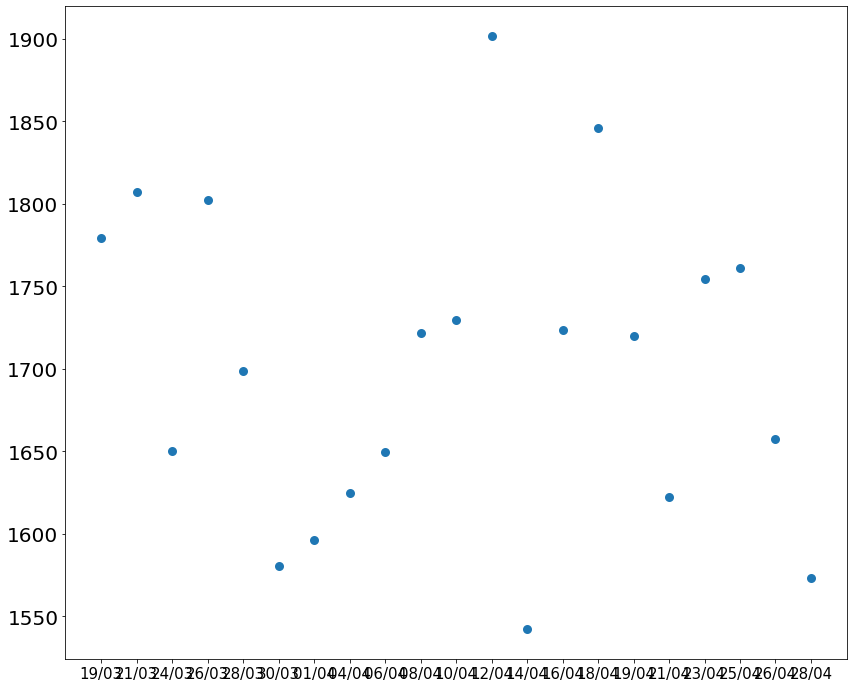

In [9]:
customFig()
plt.scatter(runData.data['Date'],calc3(runData.data['HR'],
                                               runData.data['PaceF'],
                                               runData.data['Temp']),label='Daily Performance',linewidth=3)
#plt.ylim(0.0005,0.00075)
#customFig()
#plt.scatter(runData.data['HR'],runData.data['Temp'],label='Daily Performance',linewidth=3)
#customFig()
#plt.scatter(runData.data['Temp'],runData.data['PaceF'],label='Daily Performance',linewidth=3)

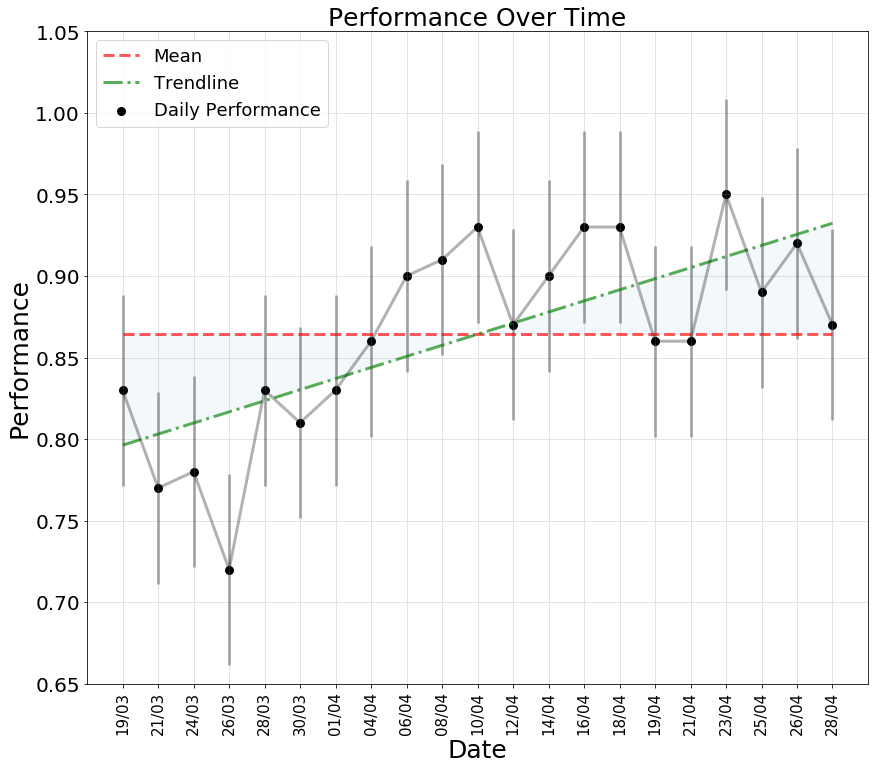

In [13]:
fig, ax = plt.subplots(figsize=(14,12))

for tick in ax.xaxis.get_major_ticks():
    tick.label.set_fontsize(15)
for tick in ax.yaxis.get_major_ticks():
    tick.label.set_fontsize(20)

plt.scatter(runData.data['Date'],runData.data['Performance'],label='Daily Performance',color='black',linewidth=3)

plt.errorbar(runData.data['Date'],runData.data['Performance'],yerr=std,alpha=.3,color='black',linewidth=3)

plt.plot(runData.data['Date'],average,color='red',label='Mean',linestyle='--',linewidth=3,alpha=.65)

plt.plot(runData.data['Date'],trendline,color='green',label='Trendline',linestyle='dashdot',linewidth=3,alpha=.65)

ax.fill_between(runData.data['Date'],average,trendline,alpha=.05)

plt.title('Performance Over Time',fontsize=25)
plt.xlabel('Date',fontsize=25)
plt.ylabel('Performance',fontsize=25)
plt.ylim(.65,1.05)
plt.legend(loc='upper left',fontsize=18)
plt.grid(linestyle='-', linewidth=1,alpha=.35)
plt.xticks(rotation=90)

plt.savefig('img/performance.png')

plt.show()